* 球種クラスタを作成したコード

In [2]:
import pandas as pd
df=pd.read_csv("statcast_data.csv")
pd.set_option('display.max_columns', None)  # カラムの表示制限を解除
pd.set_option('display.width', 1000)        # 横幅も広げる（必要なら）
print(df.head(200))

    pitch_type   game_date  release_speed  release_pos_x  release_pos_z    player_name  batter  pitcher     events    description  zone                                                des game_type stand p_throws home_team away_team type  hit_location      bb_type  balls  strikes  game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b  on_1b  outs_when_up  inning inning_topbot    hc_x    hc_y        vx0         vy0       vz0         ax         ay         az  sz_top  sz_bot  hit_distance_sc  launch_speed  launch_angle  effective_speed  release_spin_rate  release_extension  game_pk  fielder_2  fielder_3  fielder_4  fielder_5  fielder_6  fielder_7  fielder_8  fielder_9  release_pos_y  estimated_ba_using_speedangle  estimated_woba_using_speedangle  woba_value  woba_denom  babip_value  iso_value  launch_speed_angle  at_bat_number  pitch_number       pitch_name  home_score  away_score  bat_score  fld_score  post_away_score  post_home_score  post_bat_score  post_fld_score  \
0           FF  2

In [ ]:
import matplotlib.font_manager as fm

# 日本語対応フォント候補を抽出して表示
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if any(x in font.lower() for x in ['gothic', 'meiryo', 'noto', 'ipa', 'takao']):
        print(font)


/usr/share/fonts/truetype/fonts-japanese-gothic.ttf
/usr/share/fonts/truetype/takao-mincho/TakaoPMincho.ttf
/usr/share/fonts/truetype/noto/NotoSansMono-Regular.ttf
/usr/share/fonts/truetype/takao-gothic/TakaoGothic.ttf
/usr/share/fonts/opentype/noto/NotoSansCJK-Medium.ttc
/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf
/usr/share/fonts/opentype/noto/NotoSerifCJK-Light.ttc
/usr/share/fonts/truetype/noto/NotoColorEmoji.ttf
/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc
/usr/share/fonts/opentype/ipafont-mincho/ipam.ttf
/usr/share/fonts/truetype/takao-mincho/TakaoMincho.ttf
/usr/share/fonts/opentype/urw-base35/URWGothic-BookOblique.otf
/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf
/usr/share/fonts/opentype/ipafont-mincho/ipamp.ttf
/usr/share/fonts/truetype/noto/NotoMono-Regular.ttf
/usr/share/fonts/opentype/noto/NotoSansCJK-DemiLight.ttc
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc
/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc
/usr/share/fonts/opentype/

In [3]:
df["release_spin_rate"]


0          2484.0
1          2477.0
2          2421.0
3          2846.0
4          2450.0
            ...  
3345234    2459.0
3345235    2516.0
3345236    2528.0
3345237    2650.0
3345238    2404.0
Name: release_spin_rate, Length: 3345239, dtype: float64

In [4]:
!pip install scikit-learn

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


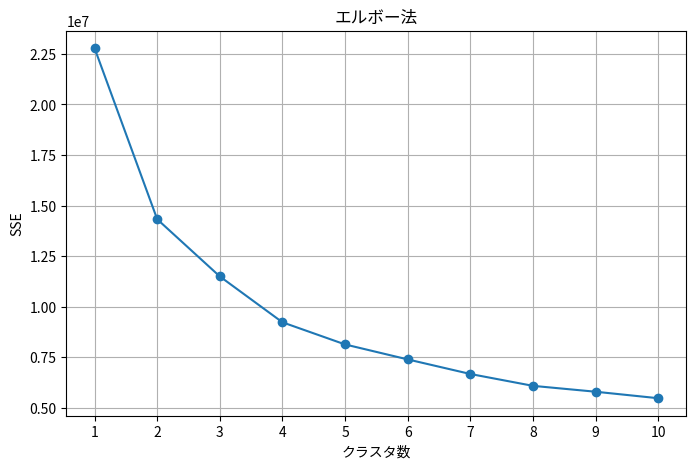

In [4]:
!pip install scikit-learn

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties


# 特徴量
features = df[['release_speed', 'pfx_x', 'pfx_z',"release_spin_rate","ax","ay","az"]].dropna()

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# エルボー法の実行
sse = []
k_range = range(1, 11)  # 1～10クラスタで試す
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # inertia_ = SSE（クラスタ内平方和）
# Noto Sans CJK を指定
jp_font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-DemiLight.ttc')

# 日本語フォント設定
rcParams['font.family'] = jp_font.get_name()
rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け対策
# グラフ表示
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('エルボー法')
plt.xlabel('クラスタ数')
plt.ylabel('SSE')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [19]:
df["pitch_type"].isna().sum()

np.int64(74036)

In [5]:
df_cluster=df[['release_speed', 'release_spin_rate', 'ay','pfx_x', 'pfx_z','pitch_type']]
features=['release_speed', 'release_spin_rate', 'ay','pfx_x', 'pfx_z']

In [6]:
# featuresの中にまだNaNがあるかチェック
df_cluster[features].isna().sum()



release_speed        75280
release_spin_rate    91262
ay                   75278
pfx_x                75297
pfx_z                75286
dtype: int64

In [7]:
df_cluster["pitch_type"].isna().sum()

np.int64(74036)

In [8]:
df["pitch_type"].isna().sum()

np.int64(74036)

In [9]:
# featuresの中にまだNaNがあるかチェック
df_cluster[features].isna().sum()
#df_cluster["pitch_type"].isna().sum()


release_speed        75280
release_spin_rate    91262
ay                   75278
pfx_x                75297
pfx_z                75286
dtype: int64

In [10]:
df_cluster["cluster"].shape

KeyError: 'cluster'

In [11]:
df["pitch_type"].shape


(3345239,)

In [12]:
for col in ['release_speed', 'release_spin_rate', 'ay']:
    df_cluster[col] = df_cluster.groupby("pitch_type")[col].transform(lambda x: x.fillna(x.mean()))

for col in ['pfx_x', 'pfx_z']:
    df_cluster[col] = df_cluster.groupby("pitch_type")[col].transform(lambda x: x.fillna(x.mean()))


/tmp/ipykernel_1586566/62696997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[col] = df_cluster.groupby("pitch_type")[col].transform(lambda x: x.fillna(x.mean()))
/tmp/ipykernel_1586566/62696997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[col] = df_cluster.groupby("pitch_type")[col].transform(lambda x: x.fillna(x.mean()))
/tmp/ipykernel_1586566/62696997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [13]:
# featuresの中にまだNaNがあるかチェック
df_cluster[features].isna().sum()



release_speed        74036
release_spin_rate    74036
ay                   74036
pfx_x                74036
pfx_z                74036
dtype: int64

In [14]:
# pitch_type も features も全部欠損 → 観測値としても無意味なので除外
df_cluster = df_cluster.dropna(subset=features + ["pitch_type"])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])

# クラスタリング
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)


/tmp/ipykernel_1586566/2918998285.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = kmeans.fit_predict(X_scaled)


In [17]:
# クラスタがNaNになってる行だけ抽出
#missing_cluster_df = df_cluster[df_cluster["cluster"].isna()]

# その中のpitch_typeの分布を確認
df_cluster["pitch_type"].value_counts()


pitch_type
FF    1090723
SL     547884
SI     507444
CH     357669
FC     244267
CU     233753
ST     131061
KC      69852
FS      67969
SV      11477
FA       4094
EP       1789
KN       1282
FO        969
CS        475
SC        299
PO        196
Name: count, dtype: int64

In [33]:
pd.crosstab(df_cluster["pitch_type"], df_cluster["cluster"], dropna=False)


cluster,0,1,2,3,4
pitch_type,,,,,
CH,23766,4252,259235,20145,50271
CS,0,464,10,0,1
CU,7,216588,5411,37,11710
EP,0,38,1751,0,0
FA,94,55,3672,25,248
FC,14893,2618,5229,50880,170647
FF,739838,28,7172,310452,33233
FO,0,0,969,0,0
FS,1642,61,65783,73,410


In [34]:
# クラスタごとの代表球種を表示
cluster_mapping = df_cluster.groupby('cluster')['pitch_type'].agg(lambda x: x.value_counts().idxmax())
print(cluster_mapping)


cluster
0    FF
1    CU
2    CH
3    FF
4    SL
Name: pitch_type, dtype: object


In [40]:
jp_font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-DemiLight.ttc')
# 日本語フォント設定
rcParams['font.family'] = jp_font.get_name()
rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け対策

pitch_type     CH     CS     CU     EP     FA     FC     FF     FO     FS     KC     KN   PO   SC     SI     SL     ST     SV
cluster                                                                                                                      
0           0.022  0.000  0.000  0.000  0.000  0.014  0.671  0.000  0.001  0.000  0.000  0.0  0.0  0.290  0.002  0.000  0.000
1           0.009  0.001  0.446  0.000  0.000  0.005  0.000  0.000  0.000  0.124  0.000  0.0  0.0  0.003  0.245  0.149  0.017
2           0.636  0.000  0.013  0.004  0.009  0.013  0.018  0.002  0.161  0.006  0.003  0.0  0.0  0.073  0.049  0.010  0.002
3           0.038  0.000  0.000  0.000  0.000  0.097  0.591  0.000  0.000  0.000  0.000  0.0  0.0  0.254  0.018  0.001  0.000
4           0.067  0.000  0.016  0.000  0.000  0.227  0.044  0.000  0.001  0.009  0.000  0.0  0.0  0.031  0.529  0.072  0.003


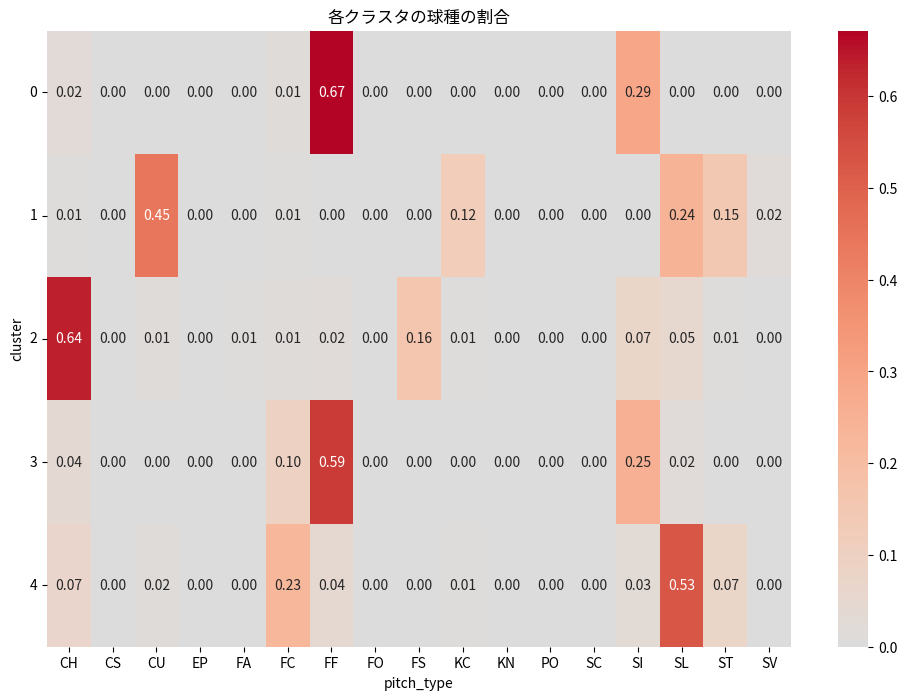

In [41]:
import seaborn as sns
# クラスタと球種のクロス集計（クラスタごとの件数）
cluster_pitch_counts = df_cluster.groupby('cluster')['pitch_type'].value_counts().unstack().fillna(0)

# 割合（行方向＝クラスタごとに正規化）
cluster_pitch_ratio = cluster_pitch_counts.div(cluster_pitch_counts.sum(axis=1), axis=0)

# 結果を表示（必要なら小数点3桁で表示）
print(cluster_pitch_ratio.round(3))
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_pitch_ratio, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("各クラスタの球種の割合")
plt.yticks(rotation=0)
plt.show()

pitch_type     CH     CS     CU     EP     FA     FC     FF   FO     FS     KC     KN     PO     SC     SI     SL     ST     SV
cluster                                                                                                                        
0           0.066  0.000  0.000  0.000  0.023  0.061  0.678  0.0  0.024  0.000  0.000  0.704  0.003  0.629  0.005  0.001  0.000
1           0.012  0.977  0.927  0.021  0.013  0.011  0.000  0.0  0.001  0.864  0.022  0.000  0.301  0.003  0.217  0.554  0.717
2           0.725  0.021  0.023  0.979  0.897  0.021  0.007  1.0  0.968  0.034  0.978  0.097  0.522  0.059  0.036  0.032  0.056
3           0.056  0.000  0.000  0.000  0.006  0.208  0.285  0.0  0.001  0.000  0.000  0.077  0.000  0.263  0.017  0.004  0.001
4           0.141  0.002  0.050  0.000  0.061  0.699  0.030  0.0  0.006  0.101  0.000  0.122  0.174  0.046  0.725  0.410  0.226


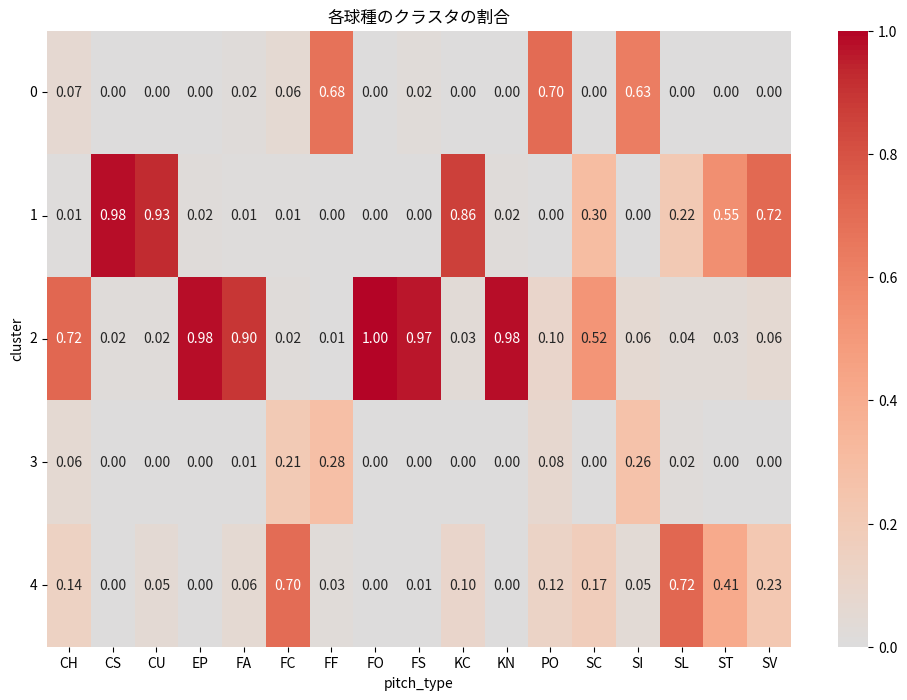

In [42]:
# クラスタと球種のクロス集計（クラスタごとの件数）
cluster_pitch_counts = df_cluster.groupby('cluster')['pitch_type'].value_counts().unstack().fillna(0)

# 割合（行方向＝クラスタごとに正規化）
cluster_pitch_ratio = cluster_pitch_counts.div(cluster_pitch_counts.sum(axis=0), axis=1)

# 結果を表示（必要なら小数点3桁で表示）
print(cluster_pitch_ratio.round(3))
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_pitch_ratio, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("各球種のクラスタの割合")
plt.yticks(rotation=0)
plt.show()

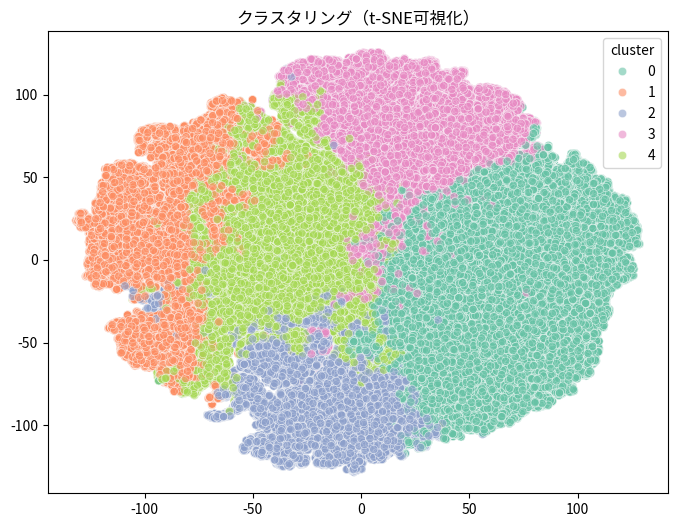

In [56]:
from sklearn.manifold import TSNE
sample_df = df_cluster.sample(n=500000, random_state=42)
X_sampled = scaler.transform(sample_df[features])
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_sampled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],
                hue=sample_df['cluster'], palette='Set2', alpha=0.6)
plt.title('クラスタリング（t-SNE可視化）')
plt.show()

In [ ]:
!pip install umap-learn

from umap import UMAP  # ← t-SNEの代わりにUMAPを使う
import matplotlib.pyplot as plt
import seaborn as sns

# サンプル抽出
sample_df = df_cluster.sample(n=500000, random_state=42)
X_sampled = scaler.transform(sample_df[features])

# UMAPで次元削減（2次元）
X_umap = UMAP(n_components=2, random_state=42).fit_transform(X_sampled)

# 可視化
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1],
                hue=sample_df['cluster'], palette='Set2', alpha=0.6)
plt.title('クラスタリング（UMAP可視化）')
plt.show()


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 10.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 10.4 MB/s eta 0:00:0000:0100:01


/home/2025/gawa/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/2025/gawa/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/2025/gawa/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/2025/gawa/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


(0.0, 100.0)

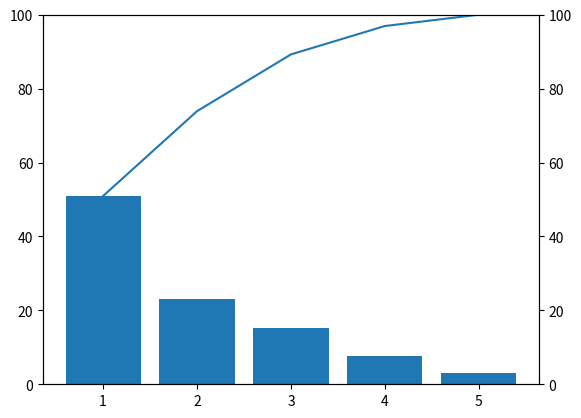

In [43]:
from sklearn.decomposition import PCA
import numpy as np
pca=PCA()
pca.fit(X_scaled) #主成分分析
ev = pd.DataFrame(pca.explained_variance_ratio_) #寄与率
t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum()) #累積寄与率

#可視化に用いる変数定義
length=5
kiyoritu=ev*100
ruiseki=t_ev*100
xlab=np.array([1,2,3,4,5])

# サイズ指定
fig = plt.figure()
# 軸関係の表示
ax = fig.add_subplot(111)

# データ数のカウント
data_num=length

# 棒グラフの描画
ax.bar(range(data_num), kiyoritu[0])
ax.set_xticks(range(data_num))
ax.set_xticklabels(xlab)
ax.set_ylim([0,100])

# 折れ線グラフの描画
ax_add = ax.twinx()
ax_add.plot(range(data_num), ruiseki[0])
ax_add.set_ylim([0, 100])


In [44]:
pcs=pca.transform(X_scaled) #転置
pcs2=pcs[:,:3] #3列目までを抽出（第三主成分までを抽出）


/home/2025/gawa/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


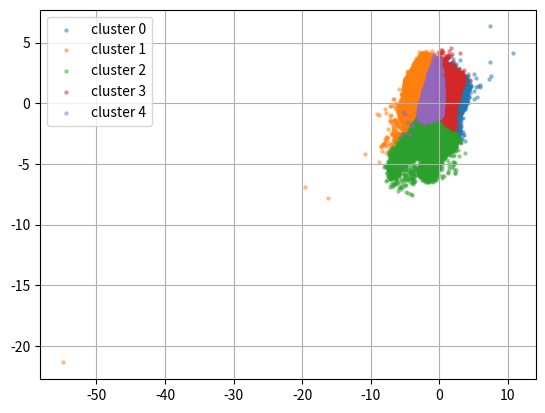

In [45]:
plt.scatter(pcs2[df_cluster['cluster']==0,0],         # cluster（クラスター番号）が0の時にpcs2の0列目を抽出
                    pcs2[df_cluster['cluster']==0,1], # cluster（クラスター番号）が0の時にpcs2の1列目を抽出
                    s=5,alpha=0.4,
                    label='cluster 0')
plt.scatter(pcs2[df_cluster['cluster']==1,0],
                    pcs2[df_cluster['cluster']==1,1],
                    s=5,alpha=0.4,
                    label='cluster 1')
plt.scatter(pcs2[df_cluster['cluster']==2,0],
                   pcs2[df_cluster['cluster']==2,1],
                    s=5,alpha=0.4,
                    label='cluster 2')
plt.scatter(pcs2[df_cluster['cluster']==3,0],
                   pcs2[df_cluster['cluster']==3,1],
                    s=5,alpha=0.4,
                    label='cluster 3')
plt.scatter(pcs2[df_cluster['cluster']==4,0],
                   pcs2[df_cluster['cluster']==4,1],
                    s=5,alpha=0.4,
                    label='cluster 4')
plt.legend() #凡例
plt.grid() #グリッド線
plt.show()

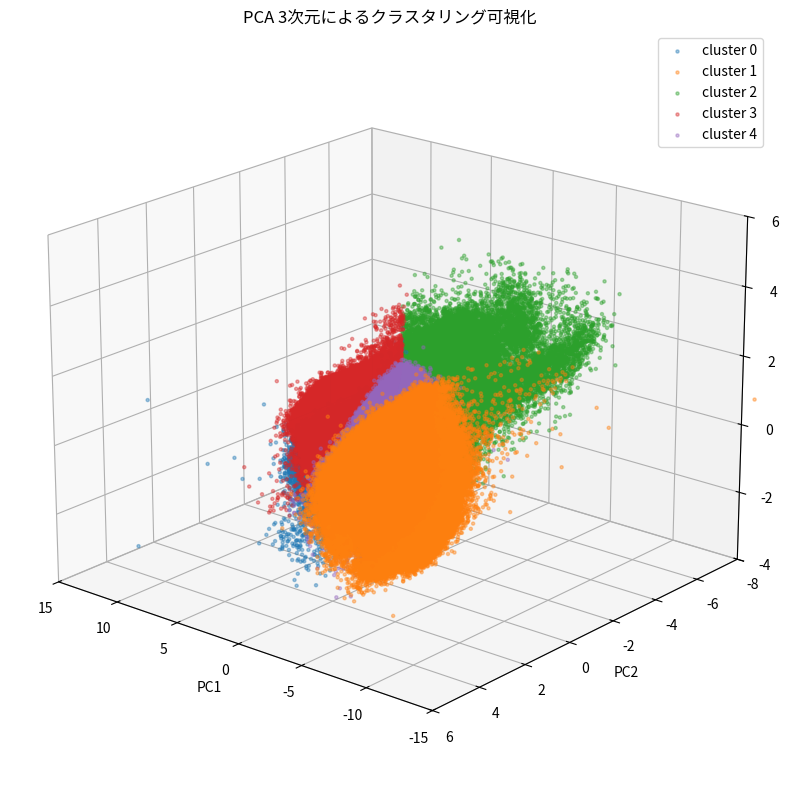

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# クラスタごとに色分け描画
cmap = plt.get_cmap("tab10")
for i in sorted(df_cluster['cluster'].unique()):
    idx = df_cluster['cluster'] == i
    ax.scatter(pcs[idx, 0], pcs[idx, 1], pcs[idx, 2],
               s=5, alpha=0.4, label=f"cluster {i}", color=cmap(i))

# 軸・角度・ラベル
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=20, azim=130)
ax.set_title('PCA 3次元によるクラスタリング可視化')
# PCA結果の軸範囲を手動で設定
ax.set_xlim(-15, 15)
ax.set_ylim(-8, 6)
ax.set_zlim(-4, 6)
ax.legend()
#plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0)
plt.show()


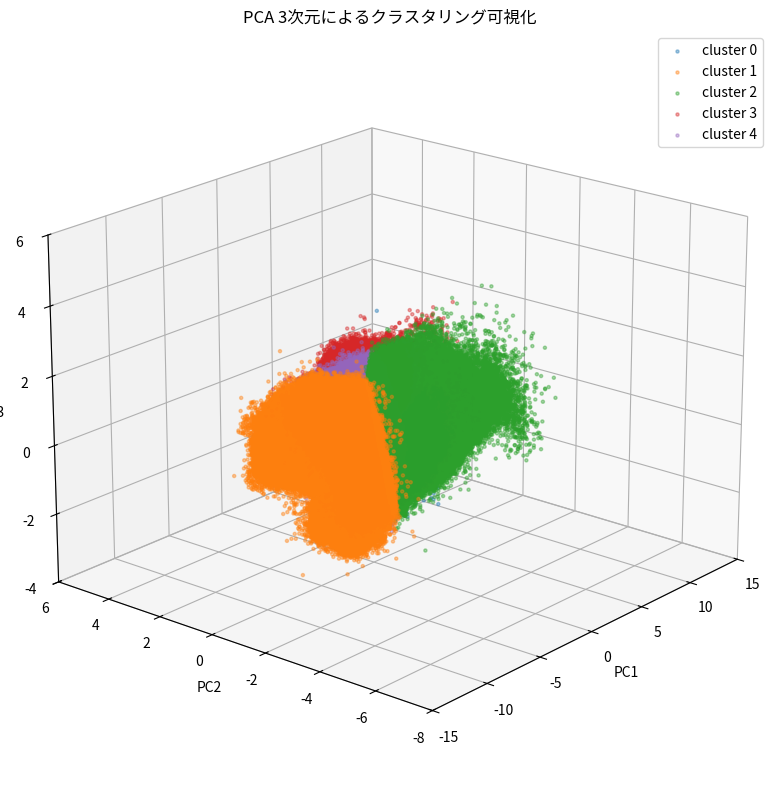

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# クラスタごとに色分け描画
cmap = plt.get_cmap("tab10")
for i in sorted(df_cluster['cluster'].unique()):
    idx = df_cluster['cluster'] == i
    ax.scatter(pcs[idx, 0], pcs[idx, 1], pcs[idx, 2],
               s=5, alpha=0.4, label=f"cluster {i}", color=cmap(i))

# 軸・角度・ラベル
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=20, azim=220)
ax.set_title('PCA 3次元によるクラスタリング可視化')
# PCA結果の軸範囲を手動で設定
ax.set_xlim(-15, 15)
ax.set_ylim(-8, 6)
ax.set_zlim(-4, 6)
ax.legend()
#plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0)
plt.show()


/home/2025/gawa/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


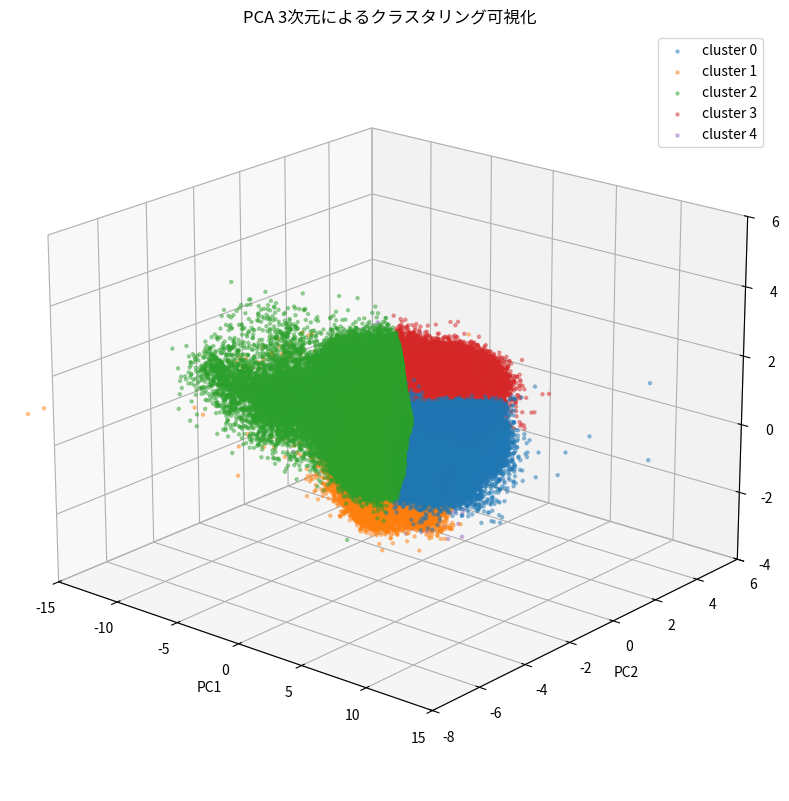

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# クラスタごとに色分け描画
cmap = plt.get_cmap("tab10")
for i in sorted(df_cluster['cluster'].unique()):
    idx = df_cluster['cluster'] == i
    ax.scatter(pcs[idx, 0], pcs[idx, 1], pcs[idx, 2],
               s=5, alpha=0.4, label=f"cluster {i}", color=cmap(i))

# 軸・角度・ラベル
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=20, azim=310)
ax.set_title('PCA 3次元によるクラスタリング可視化')
# PCA結果の軸範囲を手動で設定
ax.set_xlim(-15, 15)
ax.set_ylim(-8, 6)
ax.set_zlim(-4, 6)
ax.legend()
#plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0)
plt.show()


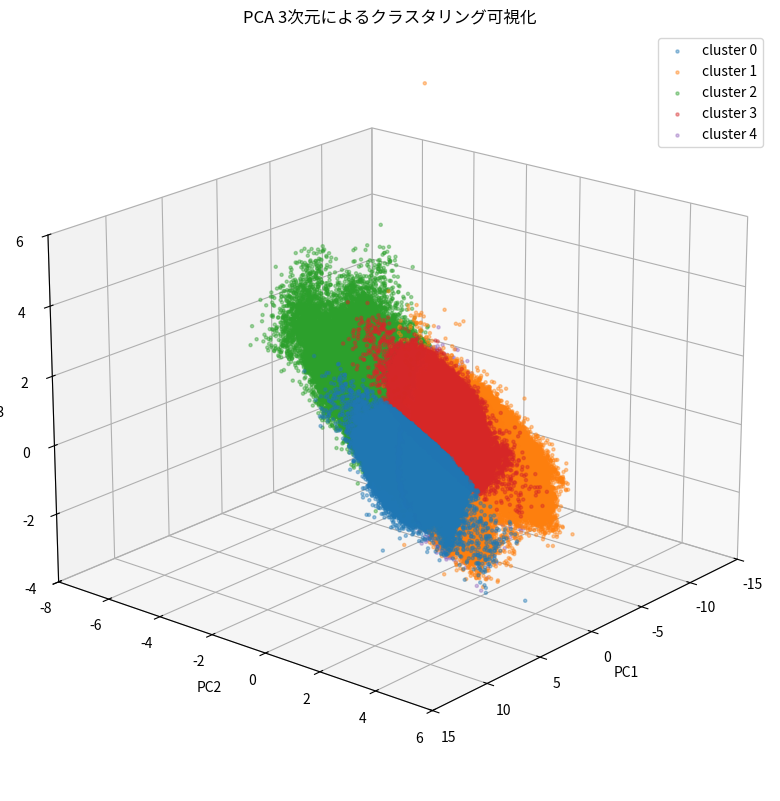

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# クラスタごとに色分け描画
cmap = plt.get_cmap("tab10")
for i in sorted(df_cluster['cluster'].unique()):
    idx = df_cluster['cluster'] == i
    ax.scatter(pcs[idx, 0], pcs[idx, 1], pcs[idx, 2],
               s=5, alpha=0.4, label=f"cluster {i}", color=cmap(i))

# 軸・角度・ラベル
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=20, azim=40)
ax.set_title('PCA 3次元によるクラスタリング可視化')
# PCA結果の軸範囲を手動で設定
ax.set_xlim(-15, 15)
ax.set_ylim(-8, 6)
ax.set_zlim(-4, 6)
ax.legend()
#plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0)
plt.show()


In [50]:
from sklearn.decomposition import PCA
import pandas as pd

# PCAの学習
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 主成分ごとの重み（＝主成分ベクトルの成分）
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2', 'PC3'],
                        index=features)  # features: 元の特徴量名
print(loadings)


                        PC1       PC2       PC3
release_speed      0.584784  0.146710  0.031901
release_spin_rate -0.083170  0.808040 -0.516343
ay                 0.549039  0.226378 -0.018002
pfx_x             -0.276624  0.523724  0.793158
pfx_z              0.522634  0.003817  0.320857


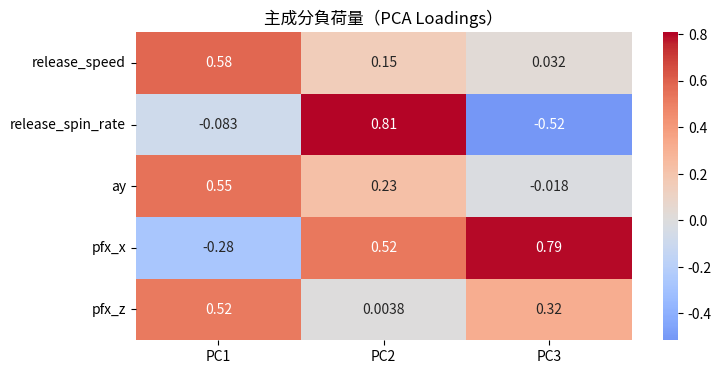

In [51]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("主成分負荷量（PCA Loadings）")
plt.show()


In [52]:
df = df.loc[df_cluster.index]


In [15]:
# cluster列に対応したラベルマップを定義
cluster_to_pitch = {
    0: "FF/SI",
    1: "CU",
    2: "CH",
    3: "FF/FC",
    4: "SL"
}

# クラスタラベルを割り当て（新しい列として）
df["pitch_cluster_label"] = df_cluster["cluster"].map(cluster_to_pitch)
df["pitch_cluster_label"]

0          FF/SI
1          FF/SI
2          FF/SI
3             CU
4          FF/SI
           ...  
3345234       CU
3345235       CU
3345236    FF/FC
3345237       CU
3345238       CU
Name: pitch_cluster_label, Length: 3345239, dtype: object

In [16]:
df["pitch_cluster_label"].isna().sum()

np.int64(74036)

In [17]:
df.to_csv("statcast_data_pitch_categori.csv")